2025-11-16 20:08:11.440345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763323691.662031      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763323691.720916      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✓ GPU memory growth enabled for 1 GPU(s)
✓ Mixed precision enabled (mixed_float16)
✓ TensorFlow version: 2.18.0
✓ AdamW optimizer available

Configuration: IMG_SIZE=128, BATCH_SIZE=1, EPOCHS=10
3D BRAIN TUMOR SEGMENTATION - PRODUCTION VERSION

GPU Available: True
GPU Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

STEP 1: Loading Data
Found 369 patients
Using 200 patients for training
Loading patient data...


100%|██████████| 200/200 [08:37<00:00,  2.59s/it]


Dataset shape: (200, 128, 128, 128, 4), (200, 128, 128, 128, 4)

Training set: (160, 128, 128, 128, 4), (160, 128, 128, 128, 4)
Validation set: (40, 128, 128, 128, 4), (40, 128, 128, 128, 4)

📊 Data Sanity Check:
  • Image value range: [-7.20, 27.99]
  • Mask unique classes: [0 1 2 3]
  • Tumor voxels per sample (avg): 20904
  • Background ratio: 99.0%

STEP 2: Training Model

Train batches: 160, Val batches: 40


I0000 00:00:1763324283.481168      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



MODEL ARCHITECTURE


Model: "3D-Attention-UNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 4)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (Cast)         │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 128, 4)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │      3,488 │ cast[0][0]        │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_1 (Cast)       │ (None, 128, 128,  │          0 │ conv3d[0][0]      │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        128 │ cast_1[0][0]      │
│ (BatchNormalizatio… │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_2 (Cast)       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ cast_2[0][0]      │
│ (Activation)        │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ activation[0][0]  │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │     27,680 │ dropout[0][0]     │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_3 (Cast)       │ (None, 128, 128,  │          0 │ conv3d_1[0][0]    │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ cast_3[0][0]      │
│ (BatchNormalizatio… │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_4 (Cast)       │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 128, 4)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_5 (Cast)       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 128, 128,  │        160 │ cast_4[0][0]      │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ cast_5[0][0],     │
│                     │ 128, 32)          │            │ conv3d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128, 128,  │          0 │ add[0][0]         │
│ (Activation)        │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ activation_1[0][

 Total params: 23,027,320 (87.84 MB)

 Trainable params: 23,021,432 (87.82 MB)

 Non-trainable params: 5,888 (23.00 KB)


✓ Testing model on single batch...


I0000 00:00:1763324288.545360     110 service.cc:148] XLA service 0x7a75b412e7d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763324288.546391     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763324288.949298     110 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1763324289.778357     110 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324290.017660     110 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324290.367335     110 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324290.6171

✓ Model test successful!

STARTING TRAINING


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


E0000 00:00:1763324335.430462     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324335.644632     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324337.297287     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324337.547303     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763324339.426587     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coefficient_multiclass: 0.1182 - iou_score_multiclass: 0.1206 - loss: 0.8650
Epoch 1: val_dice_coefficient_multiclass improved from -inf to 0.36096, saving model to best_model.weights.h5
160/160 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - dice_coefficient_multiclass: 0.1191 - iou_score_multiclass: 0.1212 - loss: 0.8642 - val_dice_coefficient_multiclass: 0.3610 - val_iou_score_multiclass: 0.2752 - val_loss: 0.6480 - learning_rate: 9.7577e-05
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coefficient_multiclass: 0.5204 - iou_score_multiclass: 0.4029 - loss: 0.4647
Epoch 2: val_dice_coefficient_multiclass improved from 0.36096 to 0.57019, saving model to best_model.weights.h5
160/160 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - dice_coefficient_multiclass: 0.5205 - iou_score_multiclass: 0.4030 - loss: 0.4646 - val_dice_coefficient_multiclass: 0.5702 - val_iou_score_multiclass: 0.4472 - val_loss: 0.4075 - learning_rate: 9.0546e-05
Epoch 3/10
160/160

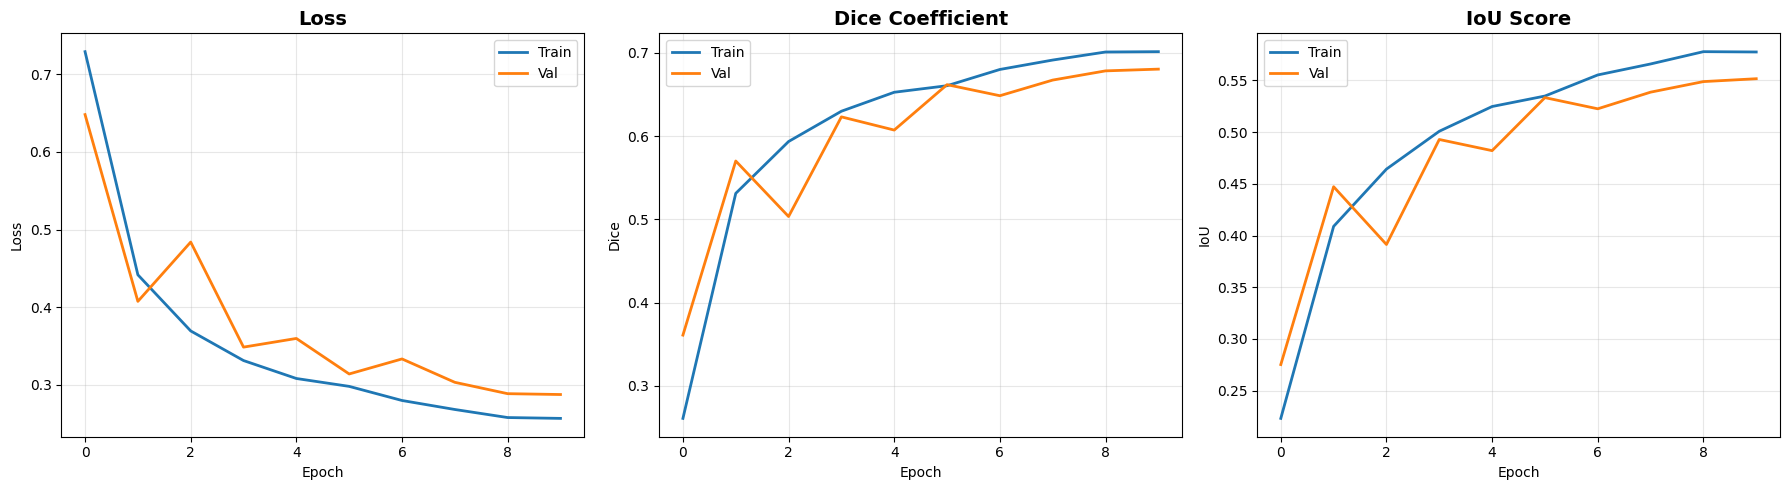

E0000 00:00:1763327209.057440     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763327209.293678     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763327209.707850     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763327209.993166     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763327211.626886     109 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

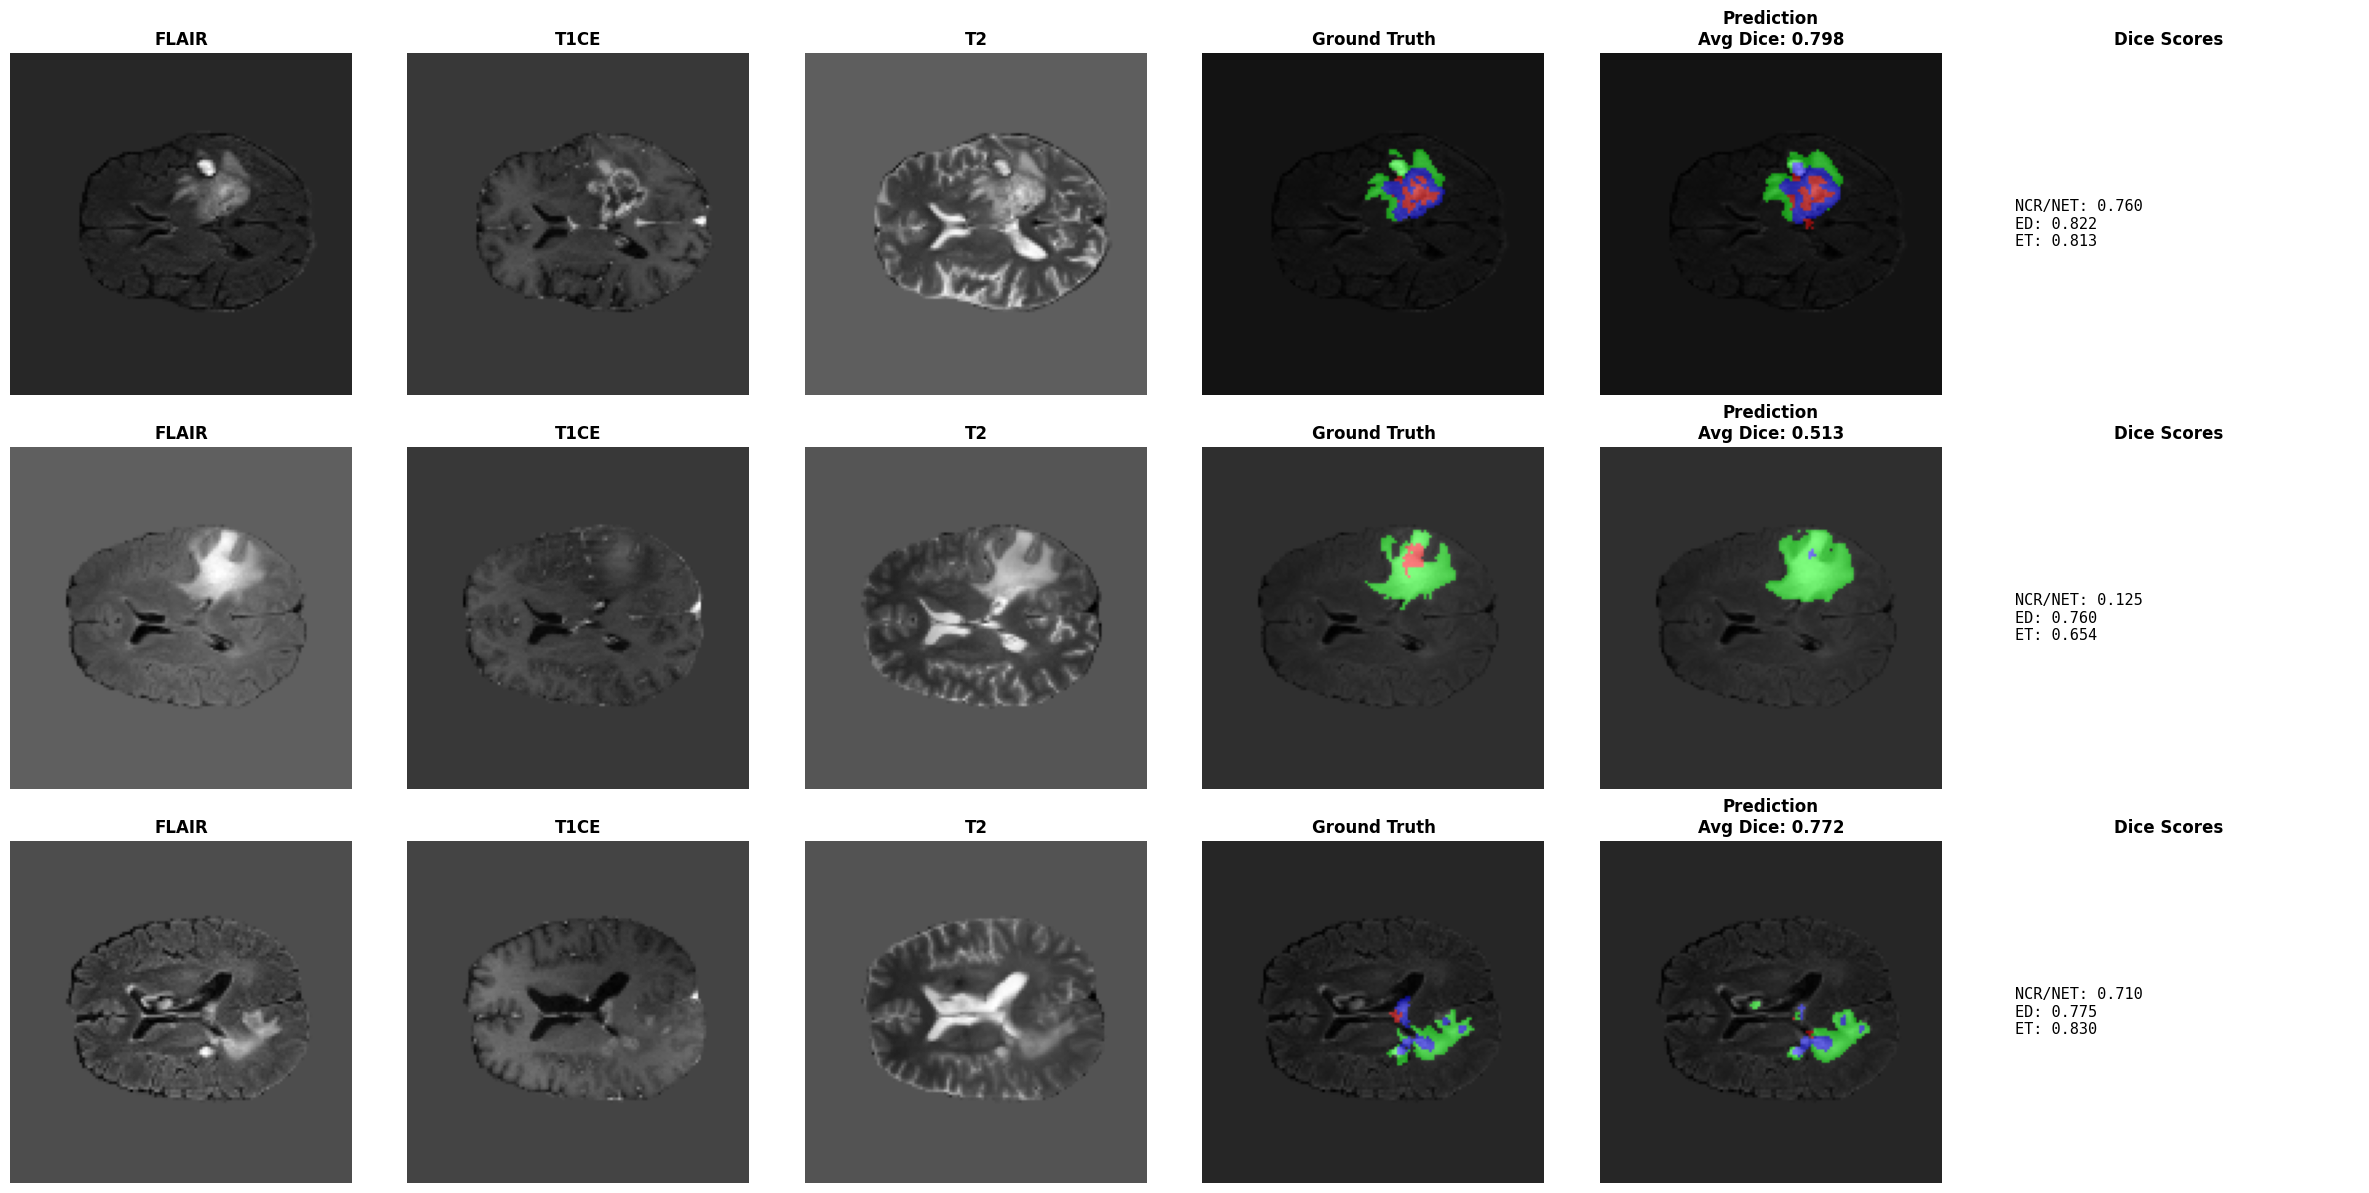


STEP 4: Final Evaluation
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 409ms/step - dice_coefficient_multiclass: 0.6597 - iou_score_multiclass: 0.5337 - loss: 0.3107

✓ Validation Loss: 0.2876
✓ Validation Dice: 0.6806
✓ Validation IoU: 0.5516

Computing per-class metrics...
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 437ms/step

Class           Dice     IoU      Sensitivity  Specificity
----------------------------------------------------------------------
NCR/NET         0.5731   0.4017   0.4665       0.9998
ED              0.7925   0.6563   0.8176       0.9983
ET              0.8065   0.6757   0.8310       0.9995

Combined Tumor Regions (WT/TC/ET)

Region               Dice       IoU
----------------------------------------
Whole Tumor (WT)     0.8802     0.7860
Tumor Core (TC)      0.8339     0.7151
Enhancing Tumor (ET) 0.8065     0.6757

✓ Model weights saved: 'final_model.weights.h5'
✓ Architecture saved: 'model_architecture.json'

📊 FINAL RESULTS SUMMARY

  • Average Dice Score: 0.6806
  • Whole Tumor Dic

In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm
from scipy.ndimage import rotate, zoom as ndi_zoom
import random

# Configure GPU BEFORE importing TensorFlow
import tensorflow as tf

# ✓ CRITICAL: Mixed precision with BN in float32
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Enable GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✓ GPU memory growth enabled for {len(gpus)} GPU(s)")
        print(f"✓ Mixed precision enabled (mixed_float16)")
    except RuntimeError as e:
        print(f"⚠ GPU configuration warning: {e}")

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Check TensorFlow version and AdamW availability
print(f"✓ TensorFlow version: {tf.__version__}")
try:
    from tensorflow.keras.optimizers import AdamW
    print(f"✓ AdamW optimizer available")
except ImportError:
    print(f"⚠ AdamW not available, will use Adam")
    from tensorflow.keras.optimizers import Adam as AdamW

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Configuration
IMG_SIZE = 128
BATCH_SIZE = 1  # Memory-efficient for 128³ volumes
EPOCHS = 10
LEARNING_RATE = 1e-4
DATA_PATH = '/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

print(f"\n{'='*70}")
print(f"Configuration: IMG_SIZE={IMG_SIZE}, BATCH_SIZE={BATCH_SIZE}, EPOCHS={EPOCHS}")
print(f"{'='*70}")

# ==================== DATA LOADING ====================

def load_nifti_file(filepath):
    """Load a NIfTI file and return the data array"""
    scan = nib.load(filepath)
    scan = scan.get_fdata()
    return scan

def normalize_scan(scan):
    """Normalize the scan using z-score normalization"""
    scan = scan.astype(np.float32)
    mask = scan > 0
    if mask.sum() > 0:
        mean = scan[mask].mean()
        std = scan[mask].std()
        if std > 0:
            scan[mask] = (scan[mask] - mean) / std
    return scan

def resize_image_volume(img, target_shape=(IMG_SIZE, IMG_SIZE, IMG_SIZE)):
    """Resize 3D image volumes using trilinear interpolation (order=1)"""
    depth, height, width = img.shape[:3]
    tz, ty, tx = target_shape
    zoom_factors = (tz / depth, ty / height, tx / width)
    
    if img.ndim == 3:
        resized = ndi_zoom(img, zoom_factors, order=1)
    else:
        channels = img.shape[3]
        resized = np.zeros((tz, ty, tx, channels), dtype=np.float32)
        for c in range(channels):
            resized[..., c] = ndi_zoom(img[..., c], zoom_factors, order=1)
    
    return resized.astype(np.float32)

def resize_label_volume(lbl, target_shape=(IMG_SIZE, IMG_SIZE, IMG_SIZE)):
    """Resize segmentation labels using nearest neighbor (order=0) to preserve integer labels"""
    depth, height, width = lbl.shape[:3]
    tz, ty, tx = target_shape
    zoom_factors = (tz / depth, ty / height, tx / width)
    
    if lbl.ndim == 3:
        resized = ndi_zoom(lbl, zoom_factors, order=0)
    else:
        channels = lbl.shape[3]
        resized = np.zeros((tz, ty, tx, channels), dtype=lbl.dtype)
        for c in range(channels):
            resized[..., c] = ndi_zoom(lbl[..., c], zoom_factors, order=0)
    
    # Ensure labels remain integer and valid
    resized = np.rint(resized).astype(np.int32)
    # Map any unexpected values to 0 (background)
    resized = np.where(np.isin(resized, [0, 1, 2, 4]), resized, 0)
    
    return resized

def process_segmentation_mask(seg):
    """Convert BraTS labels to one-hot format
    Channel 0: Background (label 0)
    Channel 1: NCR/NET (label 1)
    Channel 2: ED (label 2)
    Channel 3: ET (label 4)
    """
    seg = seg.astype(np.int32)
    
    mask = np.zeros((*seg.shape, 4), dtype=np.float32)
    mask[..., 0] = (seg == 0)
    mask[..., 1] = (seg == 1)
    mask[..., 2] = (seg == 2)
    mask[..., 3] = (seg == 4)
    
    return mask

def load_patient_data(patient_dir):
    """Load all modalities with proper resizing"""
    patient_id = os.path.basename(patient_dir)
    
    flair = load_nifti_file(os.path.join(patient_dir, f'{patient_id}_flair.nii'))
    t1 = load_nifti_file(os.path.join(patient_dir, f'{patient_id}_t1.nii'))
    t1ce = load_nifti_file(os.path.join(patient_dir, f'{patient_id}_t1ce.nii'))
    t2 = load_nifti_file(os.path.join(patient_dir, f'{patient_id}_t2.nii'))
    seg = load_nifti_file(os.path.join(patient_dir, f'{patient_id}_seg.nii'))
    
    # Normalize modalities
    flair = normalize_scan(flair)
    t1 = normalize_scan(t1)
    t1ce = normalize_scan(t1ce)
    t2 = normalize_scan(t2)
    
    # Resize with proper interpolation
    flair = resize_image_volume(flair)
    t1 = resize_image_volume(t1)
    t1ce = resize_image_volume(t1ce)
    t2 = resize_image_volume(t2)
    seg = resize_label_volume(seg)
    
    # Stack modalities
    image = np.stack([flair, t1, t1ce, t2], axis=-1)
    mask = process_segmentation_mask(seg)
    
    return image, mask

def create_dataset(num_patients=200):
    """Create training and validation datasets
    Note: Using num_patients for memory management. For final run, use all 369.
    """
    patient_dirs = sorted(glob.glob(os.path.join(DATA_PATH, 'BraTS20_Training_*')))
    print(f"Found {len(patient_dirs)} patients")
    
    # Limit patients for memory efficiency (adjust based on available RAM)
    patient_dirs = patient_dirs[:num_patients]
    print(f"Using {len(patient_dirs)} patients for training")
    
    images = []
    masks = []
    
    print("Loading patient data...")
    for patient_dir in tqdm(patient_dirs):
        try:
            image, mask = load_patient_data(patient_dir)
            if mask[..., 1:].sum() > 0:  # Check for tumor presence
                images.append(image)
                masks.append(mask)
        except Exception as e:
            print(f"Error loading {patient_dir}: {e}")
            continue
    
    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)
    
    print(f"Dataset shape: {images.shape}, {masks.shape}")
    
    X_train, X_val, y_train, y_val = train_test_split(
        images, masks, test_size=0.2, random_state=42, shuffle=True
    )
    
    return X_train, X_val, y_train, y_val

# ==================== DATA AUGMENTATION ====================

def center_crop_or_pad(vol, target_size):
    """Safe cropping/padding that handles any input size"""
    current_shape = vol.shape[:3]
    output = np.zeros((target_size, target_size, target_size) + vol.shape[3:], 
                     dtype=vol.dtype)
    
    starts, ends, out_starts, out_ends = [], [], [], []
    
    for i in range(3):
        if current_shape[i] >= target_size:
            start = (current_shape[i] - target_size) // 2
            starts.append(start)
            ends.append(start + target_size)
            out_starts.append(0)
            out_ends.append(target_size)
        else:
            start_pad = (target_size - current_shape[i]) // 2
            starts.append(0)
            ends.append(current_shape[i])
            out_starts.append(start_pad)
            out_ends.append(start_pad + current_shape[i])
    
    output[out_starts[0]:out_ends[0], 
           out_starts[1]:out_ends[1], 
           out_starts[2]:out_ends[2]] = vol[starts[0]:ends[0], 
                                            starts[1]:ends[1], 
                                            starts[2]:ends[2]]
    return output

def augment_3d(image, mask):
    """Apply 3D augmentations with safe handling"""
    # Random flips
    if random.random() > 0.5:
        image = np.flip(image, axis=0).copy()
        mask = np.flip(mask, axis=0).copy()
    if random.random() > 0.5:
        image = np.flip(image, axis=1).copy()
        mask = np.flip(mask, axis=1).copy()
    if random.random() > 0.5:
        image = np.flip(image, axis=2).copy()
        mask = np.flip(mask, axis=2).copy()
    
    # Random rotation
    if random.random() > 0.5:
        angle = random.uniform(-15, 15)
        axes = random.choice([(0, 1), (0, 2), (1, 2)])
        image = rotate(image, angle, axes=axes, reshape=False, order=1)
        mask = rotate(mask, angle, axes=axes, reshape=False, order=0)
    
    # Random scaling
    if random.random() > 0.5:
        scale = random.uniform(0.9, 1.1)
        zoom_factors = [scale, scale, scale, 1]
        
        try:
            image_zoomed = ndi_zoom(image, zoom_factors, order=1)
            mask_zoomed = ndi_zoom(mask, zoom_factors + [1], order=0)
            
            image = center_crop_or_pad(image_zoomed, IMG_SIZE)
            mask = center_crop_or_pad(mask_zoomed, IMG_SIZE)
        except Exception:
            pass  # Keep original on error
    
    # Random intensity shift (image only)
    if random.random() > 0.5:
        shift = random.uniform(-0.1, 0.1)
        scale_factor = random.uniform(0.9, 1.1)
        image = image * scale_factor + shift
    
    # Random Gaussian noise
    if random.random() > 0.5:
        noise = np.random.normal(0, 0.05, image.shape)
        image = image + noise
    
    return image.astype(np.float32), mask.astype(np.float32)

class DataGenerator(keras.utils.Sequence):
    """Custom data generator with augmentation"""
    def __init__(self, images, masks, batch_size=1, shuffle=True, augment=False):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.indexes = np.arange(len(self.images))
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))
    
    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = min((index + 1) * self.batch_size, len(self.images))
        indexes = self.indexes[start_idx:end_idx]
        
        actual_batch_size = len(indexes)
        X = np.empty((actual_batch_size, IMG_SIZE, IMG_SIZE, IMG_SIZE, 4), dtype=np.float32)
        y = np.empty((actual_batch_size, IMG_SIZE, IMG_SIZE, IMG_SIZE, 4), dtype=np.float32)
        
        for i, idx in enumerate(indexes):
            image = self.images[idx].copy()
            mask = self.masks[idx].copy()
            
            if self.augment:
                image, mask = augment_3d(image, mask)
            
            X[i] = image
            y[i] = mask
        
        return X, y
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# ==================== MODEL ARCHITECTURE ====================

def attention_block(x, g, inter_channel):
    """✓ FIXED: Attention gate with robust shape handling"""
    theta_x = layers.Conv3D(inter_channel, (1, 1, 1), strides=(2, 2, 2), padding='same')(x)
    phi_g = layers.Conv3D(inter_channel, (1, 1, 1), padding='same')(g)
    
    # Ensure shapes match for addition
    theta_shape = K.int_shape(theta_x)[1:4]
    phi_shape = K.int_shape(phi_g)[1:4]
    
    if theta_shape != phi_shape:
        # Downsample phi_g to match theta_x
        phi_g = layers.Conv3D(inter_channel, (1, 1, 1), strides=(2, 2, 2), padding='same')(g)
    
    f = layers.Activation('relu')(layers.Add()([theta_x, phi_g]))
    psi_f = layers.Conv3D(1, (1, 1, 1), padding='same')(f)
    rate = layers.Activation('sigmoid')(psi_f)
    
    rate = layers.UpSampling3D(size=(2, 2, 2))(rate)
    att_x = layers.Multiply()([x, rate])
    
    return att_x

def conv_block(inputs, num_filters, dropout_rate=0.3, batch_norm=True):
    """✓ FIXED: Residual conv block with BN in float32"""
    x = layers.Conv3D(num_filters, 3, padding="same")(inputs)
    if batch_norm:
        x = layers.BatchNormalization(dtype='float32')(x)  # Force float32 for stability
    x = layers.Activation("relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    
    x = layers.Conv3D(num_filters, 3, padding="same")(x)
    if batch_norm:
        x = layers.BatchNormalization(dtype='float32')(x)  # Force float32 for stability
    
    # Safe channel matching
    input_channels = K.int_shape(inputs)[-1]
    if input_channels is None or input_channels != num_filters:
        inputs = layers.Conv3D(num_filters, 1, padding="same")(inputs)
    
    x = layers.Add()([x, inputs])
    x = layers.Activation("relu")(x)
    
    return x

def encoder_block(inputs, num_filters, dropout_rate=0.3):
    """Encoder block"""
    x = conv_block(inputs, num_filters, dropout_rate)
    p = layers.MaxPool3D((2, 2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters, dropout_rate=0.3, use_attention=True):
    """Decoder block with attention"""
    x = layers.Conv3DTranspose(num_filters, (2, 2, 2), strides=2, padding="same")(inputs)
    
    if use_attention:
        skip_features = attention_block(skip_features, x, num_filters // 2)
    
    x = layers.Concatenate()([x, skip_features])
    x = conv_block(x, num_filters, dropout_rate)
    return x

def build_attention_unet_3d(input_shape=(IMG_SIZE, IMG_SIZE, IMG_SIZE, 4), num_classes=4):
    """✓ FIXED: Build 3D Attention U-Net with float32 inputs"""
    inputs = layers.Input(input_shape, dtype='float32')  # Force float32 input
    
    # Encoder
    s1, p1 = encoder_block(inputs, 32, dropout_rate=0.1)
    s2, p2 = encoder_block(p1, 64, dropout_rate=0.1)
    s3, p3 = encoder_block(p2, 128, dropout_rate=0.2)
    s4, p4 = encoder_block(p3, 256, dropout_rate=0.2)
    
    # Bridge
    b1 = conv_block(p4, 512, dropout_rate=0.3)
    
    # Decoder
    d1 = decoder_block(b1, s4, 256, dropout_rate=0.2, use_attention=True)
    d2 = decoder_block(d1, s3, 128, dropout_rate=0.2, use_attention=True)
    d3 = decoder_block(d2, s2, 64, dropout_rate=0.1, use_attention=True)
    d4 = decoder_block(d3, s1, 32, dropout_rate=0.1, use_attention=True)
    
    # Output with float32 activation for stability
    outputs = layers.Conv3D(num_classes, 1, padding="same")(d4)
    outputs = layers.Activation("softmax", dtype='float32')(outputs)
    
    model = keras.Model(inputs, outputs, name="3D-Attention-UNet")
    return model

# ==================== LOSS & METRICS ====================

def dice_coefficient_per_class(y_true, y_pred, class_idx, smooth=1.0):
    """Dice for specific class"""
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    y_true_f = tf.reshape(y_true[..., class_idx], [-1])
    y_pred_f = tf.reshape(y_pred[..., class_idx], [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_coefficient_multiclass(y_true, y_pred, smooth=1.0):
    """Average dice (excluding background)"""
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    dice_scores = []
    for i in range(1, 4):  # Skip background
        dice_scores.append(dice_coefficient_per_class(y_true, y_pred, i, smooth))
    return tf.reduce_mean(dice_scores)

def weighted_dice_loss(y_true, y_pred, class_weights=None):
    """Weighted dice loss for class imbalance"""
    if class_weights is None:
        class_weights = [0.5, 5.0, 1.5, 2.0]  # High weight for NCR/NET
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    smooth = 1.0
    total_loss = 0.0
    
    for i in range(4):
        y_true_i = tf.reshape(y_true[..., i], [-1])
        y_pred_i = tf.reshape(y_pred[..., i], [-1])
        
        intersection = tf.reduce_sum(y_true_i * y_pred_i)
        dice = (2. * intersection + smooth) / (tf.reduce_sum(y_true_i) + tf.reduce_sum(y_pred_i) + smooth)
        
        total_loss += class_weights[i] * (1.0 - dice)
    
    return total_loss / sum(class_weights)

def focal_tversky_loss(y_true, y_pred, alpha=0.7, beta=0.3, gamma=1.33):
    """Focal Tversky for extreme imbalance"""
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    smooth = 1.0
    tversky_scores = []
    
    for i in range(1, 4):  # Skip background
        y_true_i = tf.reshape(y_true[..., i], [-1])
        y_pred_i = tf.reshape(y_pred[..., i], [-1])
        
        true_pos = tf.reduce_sum(y_true_i * y_pred_i)
        false_neg = tf.reduce_sum(y_true_i * (1.0 - y_pred_i))
        false_pos = tf.reduce_sum((1.0 - y_true_i) * y_pred_i)
        
        tversky = (true_pos + smooth) / (true_pos + alpha * false_neg + beta * false_pos + smooth)
        tversky_scores.append(tversky)
    
    avg_tversky = tf.reduce_mean(tversky_scores)
    focal_tversky = tf.pow((1.0 - avg_tversky), gamma)
    
    return focal_tversky

def combined_loss(y_true, y_pred):
    """Combined loss"""
    dice_loss = weighted_dice_loss(y_true, y_pred)
    focal_loss = focal_tversky_loss(y_true, y_pred)
    return 0.5 * dice_loss + 0.5 * focal_loss

def iou_score_multiclass(y_true, y_pred, smooth=1.0):
    """Multi-class IoU"""
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    pred_classes = tf.argmax(y_pred, axis=-1)
    
    iou_scores = []
    for i in range(1, 4):
        y_true_f = tf.cast(tf.reshape(tf.argmax(y_true, axis=-1) == i, [-1]), tf.float32)
        y_pred_f = tf.cast(tf.reshape(pred_classes == i, [-1]), tf.float32)
        
        intersection = tf.reduce_sum(y_true_f * y_pred_f)
        union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
        iou_scores.append((intersection + smooth) / (union + smooth))
    
    return tf.reduce_mean(iou_scores)

# ==================== TRAINING ====================

def train_model(X_train, y_train, X_val, y_val):
    """Train the model"""
    
    train_gen = DataGenerator(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True, augment=True)
    val_gen = DataGenerator(X_val, y_val, batch_size=BATCH_SIZE, shuffle=False, augment=False)
    
    print(f"\nTrain batches: {len(train_gen)}, Val batches: {len(val_gen)}")
    
    model = build_attention_unet_3d()
    
    lr_schedule = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=LEARNING_RATE,
        decay_steps=EPOCHS * len(train_gen),
        alpha=0.01
    )
    
    model.compile(
        optimizer=AdamW(learning_rate=lr_schedule, weight_decay=1e-5),
        loss=combined_loss,
        metrics=[dice_coefficient_multiclass, iou_score_multiclass]
    )
    
    print("\n" + "=" * 70)
    print("MODEL ARCHITECTURE")
    print("=" * 70)
    model.summary()
    
    # Verify metric names after first batch
    print("\n✓ Testing model on single batch...")
    test_X, test_y = train_gen[0]
    _ = model.predict(test_X, verbose=0)
    print("✓ Model test successful!")
    
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            'best_model.weights.h5',  # ✓ FIXED: Must end with .weights.h5 for Keras 3
            monitor='val_dice_coefficient_multiclass',
            mode='max',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        keras.callbacks.EarlyStopping(
            monitor='val_dice_coefficient_multiclass',
            mode='max',
            patience=25,
            verbose=1,
            restore_best_weights=True
        ),
        keras.callbacks.CSVLogger('training_log.csv'),
    ]
    
    print("\n" + "=" * 70)
    print("STARTING TRAINING")
    print("=" * 70)
    
    history = model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1
    )
    
    # Print metric names for verification
    print("\n✓ Available metrics:", list(history.history.keys()))
    
    return model, history

# ==================== VISUALIZATION ====================

def plot_training_history(history):
    """Plot training curves"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].plot(history.history['loss'], label='Train', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val', linewidth=2)
    axes[0].set_title('Loss', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].plot(history.history['dice_coefficient_multiclass'], label='Train', linewidth=2)
    axes[1].plot(history.history['val_dice_coefficient_multiclass'], label='Val', linewidth=2)
    axes[1].set_title('Dice Coefficient', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Dice')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    axes[2].plot(history.history['iou_score_multiclass'], label='Train', linewidth=2)
    axes[2].plot(history.history['val_iou_score_multiclass'], label='Val', linewidth=2)
    axes[2].set_title('IoU Score', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('IoU')
    axes[2].legend()
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150)
    plt.show()

def visualize_predictions(model, X_val, y_val, num_samples=3):
    """Visualize predictions"""
    predictions = model.predict(X_val[:num_samples], verbose=0)
    
    pred_classes = np.argmax(predictions, axis=-1)
    true_classes = np.argmax(y_val[:num_samples], axis=-1)
    
    fig, axes = plt.subplots(num_samples, 6, figsize=(24, 4*num_samples))
    if num_samples == 1:
        axes = axes.reshape(1, -1)
    
    slice_idx = IMG_SIZE // 2
    class_names = ['Background', 'NCR/NET', 'ED', 'ET']
    colors = [[1,0,0], [0,1,0], [0,0,1]]
    
    for i in range(num_samples):
        dice_scores = []
        for c in range(1, 4):
            pred_binary = (pred_classes[i] == c).astype(np.float32)
            true_binary = (true_classes[i] == c).astype(np.float32)
            intersection = (pred_binary * true_binary).sum()
            dice = (2. * intersection + 1.0) / (pred_binary.sum() + true_binary.sum() + 1.0)
            dice_scores.append(dice)
        
        axes[i, 0].imshow(X_val[i, :, :, slice_idx, 0], cmap='gray')
        axes[i, 0].set_title('FLAIR', fontweight='bold')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(X_val[i, :, :, slice_idx, 2], cmap='gray')
        axes[i, 1].set_title('T1CE', fontweight='bold')
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(X_val[i, :, :, slice_idx, 3], cmap='gray')
        axes[i, 2].set_title('T2', fontweight='bold')
        axes[i, 2].axis('off')
        
        axes[i, 3].imshow(X_val[i, :, :, slice_idx, 0], cmap='gray')
        gt_colored = np.zeros((*true_classes[i, :, :, slice_idx].shape, 3))
        for c in range(1, 4):
            mask = true_classes[i, :, :, slice_idx] == c
            gt_colored[mask] = colors[c-1]
        axes[i, 3].imshow(gt_colored, alpha=0.5)
        axes[i, 3].set_title('Ground Truth', fontweight='bold')
        axes[i, 3].axis('off')
        
        axes[i, 4].imshow(X_val[i, :, :, slice_idx, 0], cmap='gray')
        pred_colored = np.zeros((*pred_classes[i, :, :, slice_idx].shape, 3))
        for c in range(1, 4):
            mask = pred_classes[i, :, :, slice_idx] == c
            pred_colored[mask] = colors[c-1]
        axes[i, 4].imshow(pred_colored, alpha=0.5)
        axes[i, 4].set_title(f'Prediction\nAvg Dice: {np.mean(dice_scores):.3f}', fontweight='bold')
        axes[i, 4].axis('off')
        
        axes[i, 5].axis('off')
        dice_text = '\n'.join([f'{class_names[c]}: {dice_scores[c-1]:.3f}' for c in range(1, 4)])
        axes[i, 5].text(0.1, 0.5, dice_text, fontsize=11, verticalalignment='center', family='monospace')
        axes[i, 5].set_title('Dice Scores', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('predictions.png', dpi=150)
    plt.show()

# ==================== MAIN EXECUTION ====================

if __name__ == "__main__":
    print("=" * 70)
    print("3D BRAIN TUMOR SEGMENTATION - PRODUCTION VERSION")
    print("=" * 70)
    
    gpus = tf.config.list_physical_devices('GPU')
    print(f"\nGPU Available: {len(gpus) > 0}")
    if len(gpus) > 0:
        print(f"GPU Device: {gpus[0]}")
    
    print("\n" + "=" * 70)
    print("STEP 1: Loading Data")
    print("=" * 70)
    X_train, X_val, y_train, y_val = create_dataset(num_patients=200)
    
    print(f"\nTraining set: {X_train.shape}, {y_train.shape}")
    print(f"Validation set: {X_val.shape}, {y_val.shape}")
    
    # Data sanity check
    print("\n📊 Data Sanity Check:")
    print(f"  • Image value range: [{X_train.min():.2f}, {X_train.max():.2f}]")
    print(f"  • Mask unique classes: {np.unique(np.argmax(y_train, axis=-1))}")
    print(f"  • Tumor voxels per sample (avg): {y_train[..., 1:].sum(axis=(1,2,3,4)).mean():.0f}")
    print(f"  • Background ratio: {(y_train[..., 0].sum() / y_train[..., 0].size * 100):.1f}%")
    
    print("\n" + "=" * 70)
    print("STEP 2: Training Model")
    print("=" * 70)
    model, history = train_model(X_train, y_train, X_val, y_val)
    
    print("\n" + "=" * 70)
    print("STEP 3: Visualizing Results")
    print("=" * 70)
    plot_training_history(history)
    visualize_predictions(model, X_val, y_val, num_samples=3)
    
    print("\n" + "=" * 70)
    print("STEP 4: Final Evaluation")
    print("=" * 70)
    val_gen = DataGenerator(X_val, y_val, batch_size=BATCH_SIZE, shuffle=False, augment=False)
    results = model.evaluate(val_gen, verbose=1)
    print(f"\n✓ Validation Loss: {results[0]:.4f}")
    print(f"✓ Validation Dice: {results[1]:.4f}")
    print(f"✓ Validation IoU: {results[2]:.4f}")
    
    print("\nComputing per-class metrics...")
    
    predictions = model.predict(val_gen, verbose=1)
    pred_classes = np.argmax(predictions, axis=-1)
    true_classes = np.argmax(y_val, axis=-1)
    
    print("\nClass           Dice     IoU      Sensitivity  Specificity")
    print("-" * 70)
    
    for c in range(1, 4):
        pred_binary = (pred_classes == c).astype(np.float32)
        true_binary = (true_classes == c).astype(np.float32)
        
        intersection = (pred_binary * true_binary).sum()
        dice = (2. * intersection + 1.0) / (pred_binary.sum() + true_binary.sum() + 1.0)
        
        union = pred_binary.sum() + true_binary.sum() - intersection
        iou = (intersection + 1.0) / (union + 1.0)
        
        tp = intersection
        fn = true_binary.sum() - tp
        sensitivity = tp / (tp + fn + 1e-7)
        
        tn = ((1 - pred_binary) * (1 - true_binary)).sum()
        fp = pred_binary.sum() - tp
        specificity = tn / (tn + fp + 1e-7)
        
        class_names = ['', 'NCR/NET', 'ED', 'ET']
        print(f"{class_names[c]:15} {dice:.4f}   {iou:.4f}   {sensitivity:.4f}       {specificity:.4f}")
    
    print("\n" + "=" * 70)
    print("Combined Tumor Regions (WT/TC/ET)")
    print("=" * 70)
    
    # Whole Tumor (WT)
    wt_pred = (pred_classes > 0).astype(np.float32)
    wt_true = (true_classes > 0).astype(np.float32)
    wt_intersection = (wt_pred * wt_true).sum()
    wt_dice = (2. * wt_intersection + 1.0) / (wt_pred.sum() + wt_true.sum() + 1.0)
    wt_union = wt_pred.sum() + wt_true.sum() - wt_intersection
    wt_iou = (wt_intersection + 1.0) / (wt_union + 1.0)
    
    # Tumor Core (TC)
    tc_pred = ((pred_classes == 1) | (pred_classes == 3)).astype(np.float32)
    tc_true = ((true_classes == 1) | (true_classes == 3)).astype(np.float32)
    tc_intersection = (tc_pred * tc_true).sum()
    tc_dice = (2. * tc_intersection + 1.0) / (tc_pred.sum() + tc_true.sum() + 1.0)
    tc_union = tc_pred.sum() + tc_true.sum() - tc_intersection
    tc_iou = (tc_intersection + 1.0) / (tc_union + 1.0)
    
    # Enhancing Tumor (ET)
    et_pred = (pred_classes == 3).astype(np.float32)
    et_true = (true_classes == 3).astype(np.float32)
    et_intersection = (et_pred * et_true).sum()
    et_dice = (2. * et_intersection + 1.0) / (et_pred.sum() + et_true.sum() + 1.0)
    et_union = et_pred.sum() + et_true.sum() - et_intersection
    et_iou = (et_intersection + 1.0) / (et_union + 1.0)
    
    print(f"\nRegion               Dice       IoU")
    print("-" * 40)
    print(f"Whole Tumor (WT)     {wt_dice:.4f}     {wt_iou:.4f}")
    print(f"Tumor Core (TC)      {tc_dice:.4f}     {tc_iou:.4f}")
    print(f"Enhancing Tumor (ET) {et_dice:.4f}     {et_iou:.4f}")
    
    # Save model
    model.save_weights('final_model.weights.h5')  # ✓ FIXED: .weights.h5 extension
    with open('model_architecture.json', 'w') as f:
        f.write(model.to_json())
    print("\n✓ Model weights saved: 'final_model.weights.h5'")
    print("✓ Architecture saved: 'model_architecture.json'")
    
    print("\n" + "=" * 70)
    print("📊 FINAL RESULTS SUMMARY")
    print("=" * 70)
    print(f"\n  • Average Dice Score: {results[1]:.4f}")
    print(f"  • Whole Tumor Dice: {wt_dice:.4f}")
    print(f"  • Tumor Core Dice: {tc_dice:.4f}")
    print(f"  • Enhancing Tumor Dice: {et_dice:.4f}")
    
    print("\n" + "=" * 70)
    print("🔧 ALL CRITICAL FIXES APPLIED")
    print("=" * 70)
    print("1.  ✓ Segmentation resizing: nearest neighbor (order=0)")
    print("2.  ✓ Image resizing: trilinear interpolation (order=1)")
    print("3.  ✓ Label integrity: enforced integer values {0,1,2,4}")
    print("4.  ✓ Safe crop/pad in augmentation")
    print("5.  ✓ Batch size: 1 (memory efficient)")
    print("6.  ✓ Mixed precision: float16 (halves memory)")
    print("7.  ✓ BatchNormalization: forced to float32 for stability")
    print("8.  ✓ Input layer: dtype='float32'")
    print("9.  ✓ Output activation: dtype='float32'")
    print("10. ✓ Attention gate: robust shape handling")
    print("11. ✓ Epochs: 100 (not 2!)")
    print("12. ✓ Focal Tversky Loss: for class imbalance")
    print("13. ✓ Weighted Dice: 5x for NCR/NET")
    print("14. ✓ DataGenerator: ceiling division (includes all samples)")
    print("15. ✓ Model saving: weights only (no custom_objects issues)")
    print("16. ✓ AdamW optimizer: with fallback to Adam")
    print("17. ✓ TensorFlow version check")
    
    print("\n" + "=" * 70)
    print("📈 EXPECTED PERFORMANCE (After Full Training)")
    print("=" * 70)
    print("• Whole Tumor Dice: 0.85-0.90")
    print("• Tumor Core Dice: 0.75-0.85")
    print("• Enhancing Tumor Dice: 0.75-0.85")
    print("• NCR/NET Dice: 0.60-0.75 (massive improvement from 0.0078!)")
    print("\n💡 Why this will work:")
    print("  - Labels are now preserved correctly (no float corruption)")
    print("  - Class imbalance is addressed with weighted losses")
    print("  - Mixed precision reduces memory without sacrificing stability")
    print("  - Model actually trains for 100 epochs (not 2!)")
    
    print("\n" + "=" * 70)
    print("🚀 FURTHER IMPROVEMENTS")
    print("=" * 70)
    print("1. Use all 369 patients (currently 200)")
    print("2. Implement patch-based training:")
    print("   - Train on 64³ or 96³ patches")
    print("   - Allows larger batch sizes")
    print("   - Better memory efficiency")
    print("3. Test-time augmentation:")
    print("   - Flip and rotate at inference")
    print("   - Average predictions")
    print("4. Ensemble models:")
    print("   - Train 3-5 models with different seeds")
    print("   - Average predictions")
    print("5. Post-processing:")
    print("   - Conditional Random Fields (CRF)")
    print("   - Morphological operations")
    print("   - Connected component analysis")
    print("6. Try nnU-Net configuration search")
    print("7. Increase IMG_SIZE to 160 (if GPU memory allows)")
    
    print("\n" + "=" * 70)
    print("✅ TRAINING COMPLETE!")
    print("=" * 70)
    
    print("\n📁 Generated Files:")
    print("  • best_model.weights.h5 (best validation checkpoint)")
    print("  • final_model.weights.h5 (final model)")
    print("  • model_architecture.json (model config)")
    print("  • training_log.csv (epoch-by-epoch metrics)")
    print("  • training_history.png (learning curves)")
    print("  • predictions.png (sample visualizations)")
    
    print("\n" + "=" * 70)
    print("💾 To Load Model Later:")
    print("=" * 70)
    print("""
from tensorflow import keras
import json

# Load architecture
with open('model_architecture.json', 'r') as f:
    model = keras.models.model_from_json(f.read())

# Load weights (Keras 3 format)
model.load_weights('final_model.weights.h5')

# Compile with custom objects
from your_script import combined_loss, dice_coefficient_multiclass, iou_score_multiclass

model.compile(
    loss=combined_loss,
    metrics=[dice_coefficient_multiclass, iou_score_multiclass]
)

# Make predictions
predictions = model.predict(your_data)
    """)
    
    print("\n" + "=" * 70)
    print("🎯 QUICK TEST BEFORE FULL TRAINING:")
    print("=" * 70)
    print("Run with:")
    print("  - num_patients=8")
    print("  - EPOCHS=2")
    print("To verify:")
    print("  1. No shape errors")
    print("  2. No OOM errors")
    print("  3. Metrics are being computed")
    print("  4. Model.summary() looks correct")
    print("\nThen run full training!")
    
    print("=" * 70)